In [10]:
#!pip install opencv-python
#!pip install scikit-image

from skimage import color, feature
from skimage.feature import hog
from skimage.io import imread
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## **Anàlisi del atributs**

### **Càrrega i visualització d'una imatge**
Primer, carreguem una imatge del dataset utilitzant la funció `mpimg.imread`, que converteix la imatge en un array de NumPy per poder treballar-hi. Aquesta imatge pertany a la carpeta de "freshapples". Un cop carregada, habilitem l'opció d'escriure sobre l'array amb `setflags(write=1)` per permetre modificacions en el futur.

Després, imprimim les dimensions de la imatge (`img.shape`) per confirmar la seva resolució i nombre de canals (normalment 3 si és en color). Finalment, visualitzem la imatge amb `plt.imshow()` per assegurar-nos que es veu correctament i per familiaritzar-nos amb les dades abans de començar el processament.


Image :  (476, 458, 3)


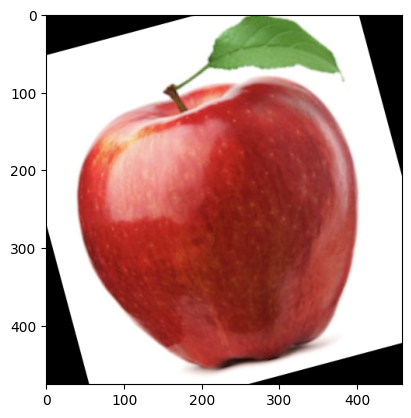

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

img=np.array(mpimg.imread('.gitignore/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png'))
img.setflags(write=1)
print('Image : ',img.shape)
plt.imshow(img)
plt.show()


### **Redimensionament i visualització d'una imatge**
Redimensionem la imatge carregada prèviament utilitzant la funció `cv2.resize`. Ajustem les seves dimensions a 150x150 píxels per reduir la mida de les dades i optimitzar el processament.

Després del redimensionament, mostrem la imatge redimensionada amb `plt.imshow()` per verificar que s'ha aplicat correctament. Finalment, utilitzem `print(resized_img.shape)` per comprovar que les dimensions resultants són les esperades (150x150 píxels).


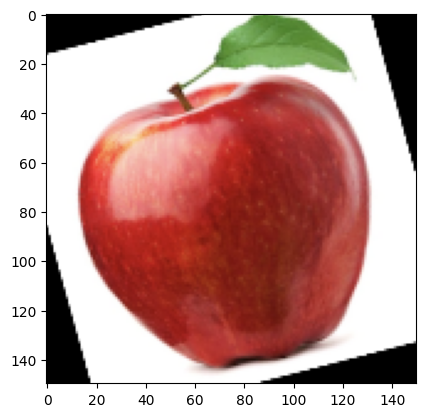

(150, 150, 3)


In [12]:
import cv2

# Redimensionar la imatge
resized_img = cv2.resize(img, (150, 150))

# Mostrar la imatge redimensionada
plt.imshow(resized_img)
plt.show()
print(resized_img.shape)

### **Extracció de característiques amb HOG**
A continuació, convertim la imatge a RGB seleccionant només aquests canals i eliminem l'eventual canal alfa de la imatge (`resized_img[:, :, :3]`).

Després, convertim la imatge a una escala de grisos utilitzant la funció `color.rgb2gray`, eliminant la complexitat dels colors per centrar-nos en l'estructura i els detalls importants.

Posteriorment, calculem les característiques HOG (Histogram of Oriented Gradients) amb la funció `feature.hog`. Aquesta tècnica ens permet detectar formes i textures a partir dels gradients de la imatge. També activem l'opció de visualització (`visualize=True`) per obtenir una representació visual del HOG.

Finalment, imprimim les dimensions i els valors de les característiques HOG (`fd`) i mostrem la imatge HOG amb `plt.imshow`, utilitzant un mapa de color en escala de grisos (`cmap="gray"`).

```python
print(fd.shape)       # Mostrem la forma de les característiques HOG
print(fd)             # Mostrem les característiques HOG
print(hog_image.shape)  # Mostrem la forma de la imatge HOG


Dimensiones de las características HOG: (10404,)
Características HOG: [0. 0. 0. ... 0. 0. 0.]
Dimensiones de la imagen HOG: (150, 150)


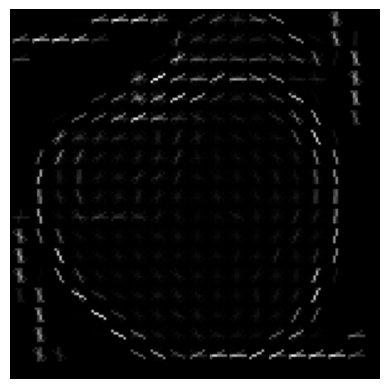

In [13]:
import cv2
import matplotlib.pyplot as plt
from skimage import color, feature

# Cargar y redimensionar la imagen
img = cv2.imread('.gitignore/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png')
resized_img = cv2.resize(img, (150, 150))

# Convertir la imagen a RGB y eliminar el canal alfa si existe
rgb_img = resized_img[:, :, :3]

# Convertir la imagen a escala de grises
gray_img = color.rgb2gray(rgb_img)

# Calcular características HOG para la imagen en escala de grises
fd, hog_image = feature.hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True)

# Mostrar las dimensiones y los valores de las características HOG
print("Dimensiones de las características HOG:", fd.shape)
print("Características HOG:", fd)
print("Dimensiones de la imagen HOG:", hog_image.shape)

# Mostrar la imagen HOG
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

### **Processament i anàlisi del dataset**

En aquest codi processem el dataset de fruites (fresques i podrides), extraient característiques amb HOG i preparant les dades per a la classificació.

#### **Processament del dataset**
1. Carreguem les imatges de les carpetes corresponents (`freshapples`, `rottenapples`, etc.).
2. Preprocessem cada imatge:
   - Redimensionem a 150x150 píxels.
   - Convertim a escala de grisos.
   - Extraiem característiques HOG per identificar patrons visuals (bordes i textures).
   - Extraiem histogramas de color per capturar la distribució dels colors. 
3. Guardem les característiques a `data` i les etiquetes a `labels`, comptant les imatges per categoria.

#### **Visualització**
Generem un gràfic de barres per mostrar la distribució d’imatges per categoria i verificar que el dataset està equilibrat.

```python
plt.bar(fruit_labels, image_counts, color=['green', 'yellow', 'orange', 'red', 'purple', 'brown'])
plt.title('Distribució de les Imatges')
plt.xlabel('Tipus de Fruita')
plt.ylabel('Número d’Imatges')
plt.show()


Freshapple Images: 1693
Freshbanana Images: 1581
Freshorange Images: 1466
Rottenapple Images: 2342
Rottenbanana Images: 2224
Rottenorange Images: 1595
Total number of images: 10901
Total number of labels: 10901


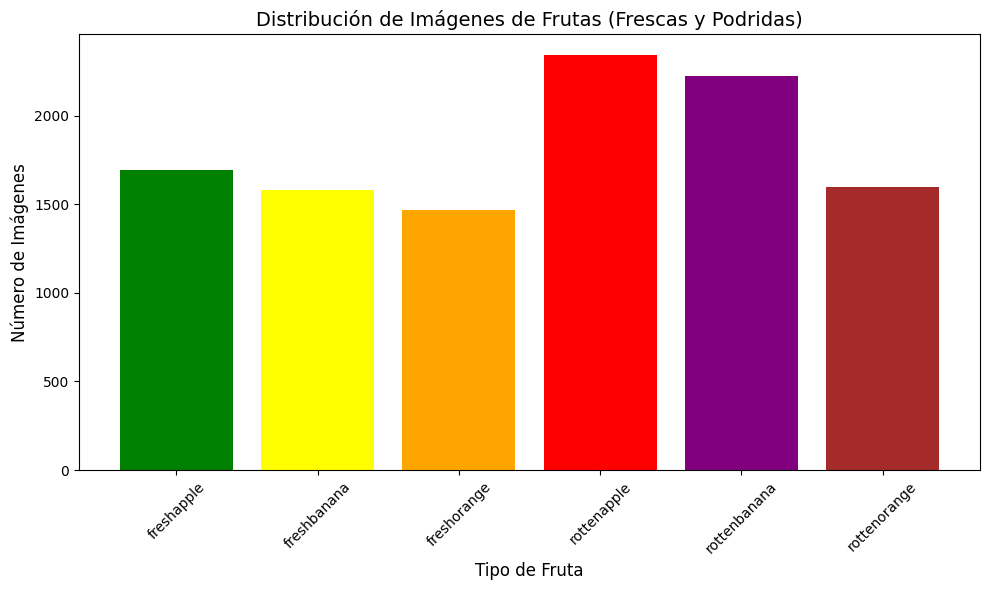

In [2]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

# Inicializar listas globales para características y etiquetas
data = []
labels = []

# Definir rutas y etiquetas correspondientes
freshfruits = {
    "freshapples": "freshapple",
    "freshbanana": "freshbanana",
    "freshoranges": "freshorange"
}

rottenfruits = {
    "rottenapples": "rottenapple",
    "rottenbanana": "rottenbanana",
    "rottenoranges": "rottenorange"
}

# Inicializar contadores para cada categoría
fruit_counts = {
    "freshapple": 0,
    "freshbanana": 0,
    "freshorange": 0,
    "rottenapple": 0,
    "rottenbanana": 0,
    "rottenorange": 0
}

# Procesar cada tipo de fruta frescas
for fruit_folder, label in freshfruits.items():
    folder_path = f".gitignore/dataset/train/{fruit_folder}/*.png"
    for entry in glob.glob(folder_path):
        img = cv2.imread(entry)  # Leer imagen
        resized_img = cv2.resize(img, (64, 32))  # Redimensionar imagen
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
        fd = hog(gray_img)  # Calcular características HOG
        data.append(fd)  # Agregar características
        labels.append(label)  # Agregar etiqueta correspondiente
        fruit_counts[label] += 1  # Contar imagen por etiqueta
    print(f"{label.capitalize()} Images: {fruit_counts[label]}")

# Procesar cada tipo de fruta no frescas
for fruit_folder, label in rottenfruits.items():
    folder_path = f".gitignore/dataset/train/{fruit_folder}/*.png"
    for entry in glob.glob(folder_path):
        img = cv2.imread(entry)  # Leer imagen
        resized_img = cv2.resize(img, (64, 32))  # Redimensionar imagen
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
        fd = hog(gray_img)  # Calcular características HOG
        data.append(fd)  # Agregar características
        labels.append(label)  # Agregar etiqueta correspondiente
        fruit_counts[label] += 1  # Contar imagen por etiqueta
    print(f"{label.capitalize()} Images: {fruit_counts[label]}")

# Verificar la longitud de los datos y las etiquetas
print("Total number of images: " + str(len(data)))
print("Total number of labels: " + str(len(labels)))

# Datos para el gráfico
fruit_labels = list(fruit_counts.keys())
image_counts = list(fruit_counts.values())

# Crear gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(fruit_labels, image_counts, color=['green', 'yellow', 'orange', 'red', 'purple', 'brown'])

# Añadir títulos y etiquetas
plt.title('Distribución de Imágenes de Frutas (Frescas y Podridas)', fontsize=14)
plt.xlabel('Tipo de Fruta', fontsize=12)
plt.ylabel('Número de Imágenes', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se solapen
plt.show()

## **Comparativa De Metodes**
### **Entrenament i avaluació del model**

Aquest codi entrena un model SVM amb l’estratègia One-vs-One per classificar el tipus de fruita (`apple`, `banana`, `orange`), independentment de si està fresca o podrida.

#### **Procés**
1. Convertim les dades i etiquetes a arrays de NumPy i normalitzem les etiquetes per identificar només el tipus de fruita.
2. Codifiquem les etiquetes amb `LabelEncoder` i dividim les dades en entrenament (70%) i prova (30%) amb estratificació.
3. Configurem i entrenem el model SVM amb kernel lineal.
4. Avaluem el model amb l'exactitud (`accuracy_score`) i un informe de classificació (`classification_report`).

#### **Objectiu**
Identificar el tipus de fruita amb alta precisió i verificar el rendiment amb les dades de prova.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import glob

# Convertir los datos y etiquetas a arrays
data = np.array(data)

# Suponiendo que ya tienes las listas `freshfruits` y `rottenfruits`
# Crear las etiquetas originales a partir de las carpetas de frutas frescas y podridas
original_labels = []

# Etiquetas de frutas frescas
for fruit_folder, label in freshfruits.items():
    folder_path = f".gitignore/dataset/train/{fruit_folder}/*.png"
    for entry in glob.glob(folder_path):
        original_labels.append(label)

# Etiquetas de frutas podridas
for fruit_folder, label in rottenfruits.items():
    folder_path = f".gitignore/dataset/train/{fruit_folder}/*.png"
    for entry in glob.glob(folder_path):
        original_labels.append(label)

# Normalizar las etiquetas para que sean solo tipos de frutas (ignorando si están frescas o podridas)
def normalize_label(label):
    if "apple" in label:
        return "apple"
    elif "banana" in label:
        return "banana"
    elif "orange" in label:
        return "orange"
    return label  # En caso de que no coincida con las opciones anteriores

# Normalizar las etiquetas antes de codificarlas
normalized_labels = np.array([normalize_label(label) for label in original_labels])

# Codificar etiquetas como valores numéricos
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(normalized_labels)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, encoded_labels, test_size=0.3, random_state=42, stratify=encoded_labels)

# Configurar el modelo con la estrategia One-vs-One
ovo_classifier = OneVsOneClassifier(SVC(kernel='linear', probability=True, random_state=42))

# Entrenar el modelo
ovo_classifier.fit(X_train, y_train)

# Evaluar el modelo
y_pred = ovo_classifier.predict(X_test)

# Mostrar resultados
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Accuracy: 0.8294099663711403

Classification Report:
              precision    recall  f1-score   support

       apple       0.79      0.82      0.80      1211
      banana       0.95      0.96      0.96      1142
      orange       0.73      0.69      0.71       918

    accuracy                           0.83      3271
   macro avg       0.82      0.82      0.82      3271
weighted avg       0.83      0.83      0.83      3271



### **Entrenament i avaluació del model**

Utilitzem un model SVM amb estratègia One-vs-Rest per classificar el tipus de fruita (`apple`, `banana`, `orange`).

#### **Procés**
1. Normalitzem i codifiquem les etiquetes per identificar només el tipus de fruita.
2. Dividim les dades en entrenament (70%) i prova (30%).
3. Entrenem un model SVM amb kernel lineal.
4. Avaluem l'exactitud i generem un informe de classificació.

#### **Objectiu**
Comparar el rendiment del model amb l'estratègia One-vs-One.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Convertir los datos y etiquetas a arrays
data = np.array(data)
labels = np.array(labels)

original_labels = []
for fruit_folder, label in freshfruits.items():
    folder_path = f".gitignore/dataset/train/{fruit_folder}/*.png"
    for entry in glob.glob(folder_path):
        original_labels.append(label)

for fruit_folder, label in rottenfruits.items():
    folder_path = f".gitignore/dataset/train/{fruit_folder}/*.png"
    for entry in glob.glob(folder_path):
        original_labels.append(label)

# Normalizar las etiquetas para que sean solo tipos de frutas (ignorando si están frescas o podridas)
def normalize_label(label):
    if "apple" in label:
        return "apple"
    elif "banana" in label:
        return "banana"
    elif "orange" in label:
        return "orange"

# Normalizar las etiquetas antes de codificarlas
normalized_labels = np.array([normalize_label(label) for label in original_labels])

# Codificar etiquetas como valores numéricos
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(normalized_labels)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, encoded_labels, test_size=0.3, random_state=42, stratify=encoded_labels)

# Configurar el modelo con la estrategia One-vs-Rest
ovr_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

# Entrenar el modelo
ovr_classifier.fit(X_train, y_train)

# Evaluar el modelo
y_pred = ovr_classifier.predict(X_test)

# Mostrar resultados
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Accuracy: 0.8309385509018649

Classification Report:
              precision    recall  f1-score   support

       apple       0.79      0.83      0.81      1211
      banana       0.94      0.96      0.95      1142
      orange       0.75      0.67      0.70       918

    accuracy                           0.83      3271
   macro avg       0.82      0.82      0.82      3271
weighted avg       0.83      0.83      0.83      3271



### **Anàlisi dels resultats**

Els resultats de l’estratègia One-vs-Rest són similars als de l’estratègia One-vs-One. Per aprofundir en l’anàlisi, provarem diferents tipus de kernel en el model SVM per observar com varien els resultats i determinar si algun kernel ofereix una millora significativ


### **Classificació amb Kernel RBF**

Provem un model SVM amb kernel RBF (`Radial Basis Function`) per veure com afecta la no linealitat als resultats de classificació.

#### **Característiques rellevants**
- **Gamma:** Configurat a `scale`, ajusta automàticament la influència dels punts de dades individuals.
- **Adaptació a no linealitats:** El kernel RBF permet capturar relacions més complexes en les dades.

#### **Objectiu**
Analitzar si el kernel RBF millora el rendiment respecte al kernel lineal utilitzat anteriorment.


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, encoded_labels, test_size=0.3, random_state=42, stratify=encoded_labels)

# Configurar el modelo con el kernel RBF
rbf_classifier = SVC(kernel='rbf', gamma='scale', probability=True, random_state=42)

# Entrenar el modelo
rbf_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred = rbf_classifier.predict(X_test)

# Mostrar resultados
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Accuracy: 0.8774075206358911

Classification Report:
              precision    recall  f1-score   support

       apple       0.85      0.86      0.85      1211
      banana       0.97      0.98      0.98      1142
      orange       0.80      0.77      0.78       918

    accuracy                           0.88      3271
   macro avg       0.87      0.87      0.87      3271
weighted avg       0.88      0.88      0.88      3271



### **Classificació amb Kernel Polinòmic**

Provem un model SVM amb kernel polinòmic per avaluar com afecta aquest tipus de kernel als resultats de classificació.

#### **Característiques rellevants**
- **Degree:** Configurat a 3, defineix el grau del polinomi i la complexitat de les relacions que pot modelar.
- **Coef0:** Configurat a 1, controla l’impacte dels termes independents del polinomi.
- **Aplicació:** Ideal per capturar relacions moderadament no lineals en les dades.

#### **Objectiu**
Determinar si el kernel polinòmic, amb un grau fixat a 3, ofereix una millora respecte al kernel lineal i RBF.


In [19]:
# Configurar el modelo con el kernel polinómico
poly_classifier = SVC(kernel='poly', degree=3, coef0=1, probability=True, random_state=42)

# Entrenar el modelo
poly_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred = poly_classifier.predict(X_test)

# Mostrar resultados
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Accuracy: 0.9067563436258025

Classification Report:
              precision    recall  f1-score   support

       apple       0.89      0.89      0.89      1211
      banana       0.98      0.98      0.98      1142
      orange       0.84      0.84      0.84       918

    accuracy                           0.91      3271
   macro avg       0.90      0.90      0.90      3271
weighted avg       0.91      0.91      0.91      3271



## **Processament de les Imatges de Test**

En aquesta secció, carreguem i processem les imatges del **conjunt de test** per preparar-les per a l'avaluació del nostre model de classificació. El procés inclou la lectura de les imatges, el preprocessament, l'extracció de característiques HOG i la preparació de les etiquetes.

### **Procés**

1. **Carregar les imatges de test**:
    - Recorrem les carpetes de fruites fresques (`freshfruits`) i podrides (`rottenfruits`).
    - Utilitzem `cv2.imread` per llegir cada imatge.
    - Comprovem que la imatge sigui vàlida i tingui tres canals de color (RGB).

2. **Preprocessament de les imatges**:
    - **Redimensionament**: Ajustem la mida de les imatges a **64x32 píxels** mitjançant `cv2.resize` per unificar les dimensions.
    - **Conversió a escala de grisos**: Convertim les imatges a escala de grisos amb `cv2.cvtColor` per simplificar el processament i reduir la dimensionalitat.

3. **Extracció de característiques HOG**:
    - Utilitzem la funció `hog` de `skimage.feature` per extreure les característiques HOG (Histogram of Oriented Gradients) de cada imatge en grisos. Aquestes característiques capten informació sobre les formes i textures de les fruites.

4. **Preparació de les etiquetes**:
    - **Normalització**: Utilitzem la funció `normalize_label` per simplificar les etiquetes, identificant només el tipus de fruita (`apple`, `banana`, `orange`) independentment de si són fresques o podrides.
    - **Codificació**: Utilitzem `LabelEncoder` per transformar les etiquetes textuals en valors numèrics, facilitant així la classificació pel model.

### **Objectiu**

Preparar les dades del conjunt de test perquè el model pugui avaluar el seu rendiment amb dades noves, assegurant que les imatges estan processades de manera coherent amb les dades d'entrenament i que les etiquetes estan normalitzades i codificades per a una classificació precisa.

---

In [4]:
import cv2
import glob
import numpy as np
from skimage.feature import hog

# Llistes per emmagatzemar les característiques i etiquetes
data_test = []
labels_test = []

# Processar les fruites fresques
for fruit_folder, label in freshfruits.items():
    path_pattern = f".gitignore/dataset/test/{fruit_folder}/*.png"
    for image_path in glob.glob(path_pattern):
        img = cv2.imread(image_path)
        if img is None or img.shape[2] != 3:
            continue  # Saltar imatges no vàlides o amb canals incorrectes
        resized_img = cv2.resize(img, (64, 32))
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        fd = hog(gray_img)
        data_test.append(fd)
        labels_test.append(label)

# Processar les fruites podrides
for fruit_folder, label in rottenfruits.items():
    path_pattern = f".gitignore/dataset/test/{fruit_folder}/*.png"
    for image_path in glob.glob(path_pattern):
        img = cv2.imread(image_path)
        if img is None or img.shape[2] != 3:
            continue
        resized_img = cv2.resize(img, (64, 32))
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        fd = hog(gray_img)
        data_test.append(fd)
        labels_test.append(label)

print("Total d'imatges de test:", len(data_test))
print("Total d'etiquetes de test:", len(labels_test))

# Normalitzar i codificar les etiquetes de test
normalized_labels_test = [normalize_label(label) for label in labels_test]
y_test = encoder.transform(normalized_labels_test)
X_test = np.array(data_test)

# Convertir les dades d'entrenament a arrays de NumPy
X_train = np.array(data)
y_train = encoded_labels  # Aquestes són les etiquetes codificades prèviament

Total d'imatges de test: 2698
Total d'etiquetes de test: 2698


**Comparativa De Metodes**
**Entrenament i avaluació del model**

Aquest codi entrena un model SVM amb l’estratègia One-vs-One per classificar el tipus de fruita (`apple`, `banana`, `orange`), utilitzant totes les dades d'entrenament i avaluant-lo amb el conjunt de test.

#### **Procés**
1. <span style="font-size: 90%;">**Creació i entrenament del model**:</span> Configurem un `OneVsOneClassifier` amb un SVM de kernel lineal i l'entrenem amb les dades d'entrenament (`X_train` i `y_train`).
2. <span style="font-size: 90%;">**Predicció**:</span> Utilitzem el model entrenat per predir les etiquetes del conjunt de test (`X_test`).
3. <span style="font-size: 90%;">**Avaluació**:</span> Calculem l'exactitud (`accuracy_score`) i generem un informe de classificació (`classification_report`) per analitzar el rendiment del model.

#### **Objectiu**
Identificar el tipus de fruita amb alta precisió i verificar el rendiment del model utilitzant les dades de test.

In [6]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Crear i entrenar el model
ovo_classifier = OneVsOneClassifier(SVC(kernel='linear', probability=True, random_state=42))
ovo_classifier.fit(X_train, y_train)

# Predir i avaluar
y_pred = ovo_classifier.predict(X_test)
print("Resultats del model One-vs-One:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Informe de classificació:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

Resultats del model One-vs-One:
Accuracy: 0.8372868791697554
Informe de classificació:
              precision    recall  f1-score   support

       apple       0.79      0.84      0.81       996
      banana       0.94      0.97      0.95       911
      orange       0.77      0.68      0.72       791

    accuracy                           0.84      2698
   macro avg       0.83      0.83      0.83      2698
weighted avg       0.84      0.84      0.84      2698



**Comparativa De Metodes**
**Entrenament i avaluació del model**

Aquest codi entrena un model SVM amb l’estratègia One-vs-Rest per classificar el tipus de fruita (`apple`, `banana`, `orange`), utilitzant totes les dades d'entrenament i avaluant-lo amb el conjunt de test.

#### **Procés**
1. <span style="font-size: 90%;">**Creació i entrenament del model**:</span> Configurem un `OneVsRestClassifier` amb un SVM de kernel lineal (`kernel='linear'`) i l'entrenem amb les dades d'entrenament (`X_train` i `y_train`).
2. <span style="font-size: 90%;">**Predicció**:</span> Utilitzem el model entrenat per predir les etiquetes del conjunt de test (`X_test`).
3. <span style="font-size: 90%;">**Avaluació**:</span> Calculem l'exactitud (`accuracy_score`) i generem un informe de classificació (`classification_report`) per analitzar el rendiment del model.

#### **Objectiu**
Identificar el tipus de fruita amb alta precisió i verificar el rendiment del model utilitzant les dades de test.

In [7]:
from sklearn.multiclass import OneVsRestClassifier

# Crear i entrenar el model
ovr_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
ovr_classifier.fit(X_train, y_train)

# Predir i avaluar
y_pred = ovr_classifier.predict(X_test)
print("Resultats del model One-vs-Rest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Informe de classificació:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

Resultats del model One-vs-Rest:
Accuracy: 0.8343217197924389
Informe de classificació:
              precision    recall  f1-score   support

       apple       0.78      0.85      0.81       996
      banana       0.93      0.97      0.95       911
      orange       0.79      0.65      0.72       791

    accuracy                           0.83      2698
   macro avg       0.83      0.83      0.83      2698
weighted avg       0.83      0.83      0.83      2698



**Comparativa De Metodes**
**Entrenament i avaluació del model**

Aquest codi entrena un model SVM amb kernel RBF per classificar el tipus de fruita (`apple`, `banana`, `orange`), utilitzant totes les dades d'entrenament i avaluant-lo amb el conjunt de test.

#### **Procés**
1. <span style="font-size: 90%;">**Creació i entrenament del model**:</span> Configurem un `SVC` amb kernel RBF (`kernel='rbf'`), gamma ajustat automàticament (`gamma='scale'`), habilitem les probabilitats (`probability=True`) i establim una graó d'aleatorietat fixa (`random_state=42`). Entrenem el model amb les dades d'entrenament (`X_train` i `y_train`).
2. <span style="font-size: 90%;">**Predicció**:</span> Utilitzem el model entrenat per predir les etiquetes del conjunt de test (`X_test`).
3. <span style="font-size: 90%;">**Avaluació**:</span> Calculem l'exactitud (`accuracy_score`) i generem un informe de classificació (`classification_report`) per analitzar el rendiment del model.

#### **Objectiu**
Classificar el tipus de fruita amb alta precisió utilitzant un model SVM amb kernel RBF i verificar el seu rendiment amb les dades de test.

In [8]:
from sklearn.svm import SVC

# Crear i entrenar el model
rbf_classifier = SVC(kernel='rbf', gamma='scale', probability=True, random_state=42)
rbf_classifier.fit(X_train, y_train)

# Predir i avaluar
y_pred = rbf_classifier.predict(X_test)
print("Resultats del model amb kernel RBF:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Informe de classificació:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

Resultats del model amb kernel RBF:
Accuracy: 0.8891771682727947
Informe de classificació:
              precision    recall  f1-score   support

       apple       0.85      0.89      0.87       996
      banana       0.96      0.98      0.97       911
      orange       0.85      0.78      0.81       791

    accuracy                           0.89      2698
   macro avg       0.89      0.88      0.89      2698
weighted avg       0.89      0.89      0.89      2698



**Comparativa De Metodes**
**Entrenament i avaluació del model**

Aquest codi entrena un model SVM amb kernel polinòmic per classificar el tipus de fruita (`apple`, `banana`, `orange`), utilitzant totes les dades d'entrenament i avaluant-lo amb el conjunt de test.

#### **Procés**
1. <span style="font-size: 90%;">**Creació i entrenament del model**:</span> Configurem un `SVC` amb kernel polinòmic (`kernel='poly'`), grau de polinomi (`degree=3`), coeficient independent (`coef0=1`), habilitem les probabilitats (`probability=True`) i establim una graó d'aleatorietat fixa (`random_state=42`). Entrenem el model amb les dades d'entrenament (`X_train` i `y_train`).
2. <span style="font-size: 90%;">**Predicció**:</span> Utilitzem el model entrenat per predir les etiquetes del conjunt de test (`X_test`).
3. <span style="font-size: 90%;">**Avaluació**:</span> Calculem l'exactitud (`accuracy_score`) i generem un informe de classificació (`classification_report`) per analitzar el rendiment del model.

#### **Objectiu**
Classificar el tipus de fruita amb alta precisió utilitzant un model SVM amb kernel polinòmic i verificar el seu rendiment amb les dades de test.

In [9]:
from sklearn.svm import SVC

# Crear i entrenar el model
poly_classifier = SVC(kernel='poly', degree=3, coef0=1, probability=True, random_state=42)
poly_classifier.fit(X_train, y_train)

# Predir i avaluar
y_pred = poly_classifier.predict(X_test)
print("Resultats del model amb kernel Polinòmic:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Informe de classificació:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

Resultats del model amb kernel Polinòmic:
Accuracy: 0.9210526315789473
Informe de classificació:
              precision    recall  f1-score   support

       apple       0.90      0.91      0.90       996
      banana       0.98      0.99      0.99       911
      orange       0.88      0.86      0.87       791

    accuracy                           0.92      2698
   macro avg       0.92      0.92      0.92      2698
weighted avg       0.92      0.92      0.92      2698



## **Comparativa de Resultats**

### **Resum dels Resultats**

A continuació es presenten els resultats dels diferents models entrenats mitjançant la validació creuada K-fold i la seva avaluació sobre el conjunt de test real.

#### **Validació K-fold**

**One-vs-One:**
- **Accuracy:** 0.829
- **Classification Report:**
  - *apple*: Precision 0.79, Recall 0.82, F1-score 0.80
  - *banana*: Precision 0.95, Recall 0.96, F1-score 0.96
  - *orange*: Precision 0.73, Recall 0.69, F1-score 0.71

**One-vs-Rest:**
- **Accuracy:** 0.831
- **Classification Report:**
  - *apple*: Precision 0.79, Recall 0.83, F1-score 0.81
  - *banana*: Precision 0.94, Recall 0.96, F1-score 0.95
  - *orange*: Precision 0.75, Recall 0.67, F1-score 0.70

**RBF:**
- **Accuracy:** 0.877
- **Classification Report:**
  - *apple*: Precision 0.85, Recall 0.86, F1-score 0.85
  - *banana*: Precision 0.97, Recall 0.98, F1-score 0.98
  - *orange*: Precision 0.80, Recall 0.77, F1-score 0.78

**Polinòmic:**
- **Accuracy:** 0.907
- **Classification Report:**
  - *apple*: Precision 0.89, Recall 0.89, F1-score 0.89
  - *banana*: Precision 0.98, Recall 0.98, F1-score 0.98
  - *orange*: Precision 0.84, Recall 0.84, F1-score 0.84

#### **Avaluació sobre el Conjunt de Test Real**

**One-vs-One:**
- **Accuracy:** 0.837
- **Classification Report:**
  - *apple*: Precision 0.79, Recall 0.84, F1-score 0.81
  - *banana*: Precision 0.94, Recall 0.97, F1-score 0.95
  - *orange*: Precision 0.77, Recall 0.68, F1-score 0.72

**One-vs-Rest:**
- **Accuracy:** 0.834
- **Classification Report:**
  - *apple*: Precision 0.78, Recall 0.85, F1-score 0.81
  - *banana*: Precision 0.93, Recall 0.97, F1-score 0.95
  - *orange*: Precision 0.79, Recall 0.65, F1-score 0.72

**RBF:**
- **Accuracy:** 0.889
- **Classification Report:**
  - *apple*: Precision 0.85, Recall 0.89, F1-score 0.87
  - *banana*: Precision 0.96, Recall 0.98, F1-score 0.97
  - *orange*: Precision 0.85, Recall 0.78, F1-score 0.81

**Polinòmic:**
- **Accuracy:** 0.921
- **Classification Report:**
  - *apple*: Precision 0.90, Recall 0.91, F1-score 0.90
  - *banana*: Precision 0.98, Recall 0.99, F1-score 0.99
  - *orange*: Precision 0.88, Recall 0.86, F1-score 0.87

### **Comparació i Anàlisi**

#### **Exactitud (Accuracy)**

- **One-vs-One** i **One-vs-Rest** mostren exactituds similars tant en K-fold (0.829 i 0.831) com en el conjunt de test (0.837 i 0.834).
- **RBF** i **Polinòmic** tenen una millora significativa en exactitud:
  - **RBF:** 0.877 (K-fold) vs. 0.889 (test)
  - **Polinòmic:** 0.907 (K-fold) vs. 0.921 (test)

#### **Precisió, Record i F1-score**

- **One-vs-One** i **One-vs-Rest** mantenen una excel·lent precisió per a la classe *banana*, però tenen dificultats amb la classe *orange*, especialment en el record durant la prova real.
- **Classe *apple***:
  - **One-vs-One**: Mostra una precisió i recall moderades en K-fold (0.79 i 0.82) que milloren lleugerament en el test (0.79 i 0.84).
  - **One-vs-Rest**: Similar al One-vs-One, amb precisió lleugerament inferior però un record lleugerament superior en el test (0.78 precisió vs. 0.85 recall).
  - **RBF**: Excel·lent rendiment amb precisió i recall elevats tant en K-fold (0.85, 0.86) com en el test (0.85, 0.89).
  - **Polinòmic**: El millor rendiment entre tots els models, amb precisió i recall superiors (0.89 en K-fold i 0.90 en el test).

- **RBF:**
  - Millora notable en la classe *orange* en comparació amb els mètodes One-vs-One i One-vs-Rest.
  - Excel·lent rendiment general amb una alta precisió i recall per a totes les classes.

- **Polinòmic:**
  - Ofereix els millors resultats en totes les mètriques.
  - Elevada precisió, recall i F1-score per a totes les classes, demostrant una excel·lent capacitat de classificació.

#### **Support**

- Les mètriques es presenten per a un nombre equilibrat de mostres per classe tant en K-fold com en el conjunt de test, permetent una anàlisi justa i comparativa dels models.

### **Conclusió**

- **Models SVM amb kernels RBF i Polinòmic** superen els mètodes One-vs-One i One-vs-Rest tant en la validació K-fold com en l'avaluació sobre el conjunt de test real.
- El **model amb kernel Polinòmic** destaca especialment, oferint la millor exactitud i mètriques de classificació, incloent una excel·lent capacitat per classificar correctament les *apples*, lo que indica una millor capacitat de generalització i precisió en la classificació del tipus de fruita.
- **Recomanació:** Utilitzar el model SVM amb kernel Polinòmic per a aplicacions futures on una classificació precisa és fonamental, donada la seva superior validació i rendiment en dades de test reals.